# Breast Cancer Prediction 

## Following analysis has been done using Unsupervsed models
- K means
- Hierarchicial clustering

In [1]:
# import the 'Breast Cancer' dataset
import pandas as pd

br_can = pd.read_csv('Breast Cancer.csv')
br_can.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
br_can.isnull().any() #checking for null values

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [3]:
y=br_can['diagnosis']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y[:10]#1=M, 0=B

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [4]:
list = ['Unnamed: 32','id','diagnosis']
x = br_can.drop(list,axis = 1 ) #keeping only the x variables for unsupervised model
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# Create 2 clusters for the dataset using KMeans clustering
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() 
sc.fit(x)
x=sc.transform(x)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x)
print(kmeans.labels_[:10])

[1 1 1 1 1 1 1 1 1 1]


In [7]:
# Create Hierarchicial clustering model using linkages : {“ward”, “complete”, “average”}
from sklearn.cluster import AgglomerativeClustering

n_clusters = 2
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
ward.fit(x)
complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
complete.fit(x)
average_link = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
average_link.fit(x)
print(ward.labels_[:10])
print(complete.labels_[:10])
print(average_link.labels_[:10])

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


In [8]:
# visualise the clusters

import matplotlib.pyplot as plt

colors = ['red', 'green']

kmn_colors = [colors[label] for label in kmeans.labels_]
ward_colors = [colors[label] for label in ward.labels_]
complete_colors = [colors[label] for label in complete.labels_]
average_colors = [colors[label] for label in average_link.labels_]
actual_colors = [colors[label] for label in y]

f, axarr = plt.subplots(1,5, sharex=True, figsize=(20,10))

axarr[0].scatter(x[:,0], x[:,1], c=actual_colors)
axarr[0].set_title('Actual Data')

axarr[1].scatter(x[:,0], x[:,1], c=kmn_colors)
axarr[1].set_title('KMeans Clusters')

axarr[2].scatter(x[:,0], x[:,1], c=ward_colors)
axarr[2].set_title('Linkage = Ward')


axarr[3].scatter(x[:,0], x[:,1], c=complete_colors)
axarr[3].set_title('Linkage = Complete')

axarr[4].scatter(x[:,0], x[:,1], c=average_colors)
axarr[4].set_title('Linkage = Average')


Text(0.5,1,'Linkage = Average')

In [9]:
y_kmn = kmeans.labels_.tolist()

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_kmn)

print(pd.DataFrame(confusion_matrix, ["Actual 0", "Actual 1"],["Predicted 0", "Predicted 1"]))

from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y,y_kmn)
print("Accuracy using K means clustering:",accuracy)



result= kmeans.labels_
br_can['label']=result
print(br_can.groupby('label')['diagnosis'].unique())
pd.crosstab(br_can.label, br_can.diagnosis, margins=True, margins_name="Total")


### Here the predicted labels and the original categories seem to be in sync with each other, so no further tweek is required

          Predicted 0  Predicted 1
Actual 0          339           18
Actual 1           36          176
Accuracy using K means clustering: 0.9050966608084359
label
0    [M, B]
1    [M, B]
Name: diagnosis, dtype: object


diagnosis,B,M,Total
label,,,
0,339,36,375
1,18,176,194
Total,357,212,569


In [10]:
y_ward = ward.labels_.tolist()
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_ward)

print(pd.DataFrame(confusion_matrix, ["Actual 0", "Actual 1"],["Predicted 0", "Predicted 1"]))

accuracy= accuracy_score(y,y_ward)
print("Accuracy using hierarchical clustering with ward linkage:",accuracy)

result= ward.labels_
br_can['label']=result
print(br_can.groupby('label')['diagnosis'].unique())

pd.crosstab(br_can.label, br_can.diagnosis, margins=True, margins_name="Total")


## Here looking at the cross tab we can also reverse the categories of predicted output
## Cross tab output suggests that label 0 of output seems to have majority values from Malign category
## and label 1 of output would have majority values from Benign categories

          Predicted 0  Predicted 1
Actual 0           20          337
Actual 1          164           48
Accuracy using hierarchical clustering with ward linkage: 0.1195079086115993
label
0    [M, B]
1    [M, B]
Name: diagnosis, dtype: object


diagnosis,B,M,Total
label,,,
0,20,164,184
1,337,48,385
Total,357,212,569


In [11]:
for i in range(len(y_ward)):
    y_ward[i] = 1 -y_ward[i] 

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_ward)

print(pd.DataFrame(confusion_matrix, ["Actual 0", "Actual 1"],["Predicted 0", "Predicted 1"]))

from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y,y_ward)
print("Accuracy using ward linkage (after reversing classes) clustering:",accuracy)


          Predicted 0  Predicted 1
Actual 0          337           20
Actual 1           48          164
Accuracy using ward linkage (after reversing classes) clustering: 0.8804920913884007


Text(0.5,1,'Linkage = Average')

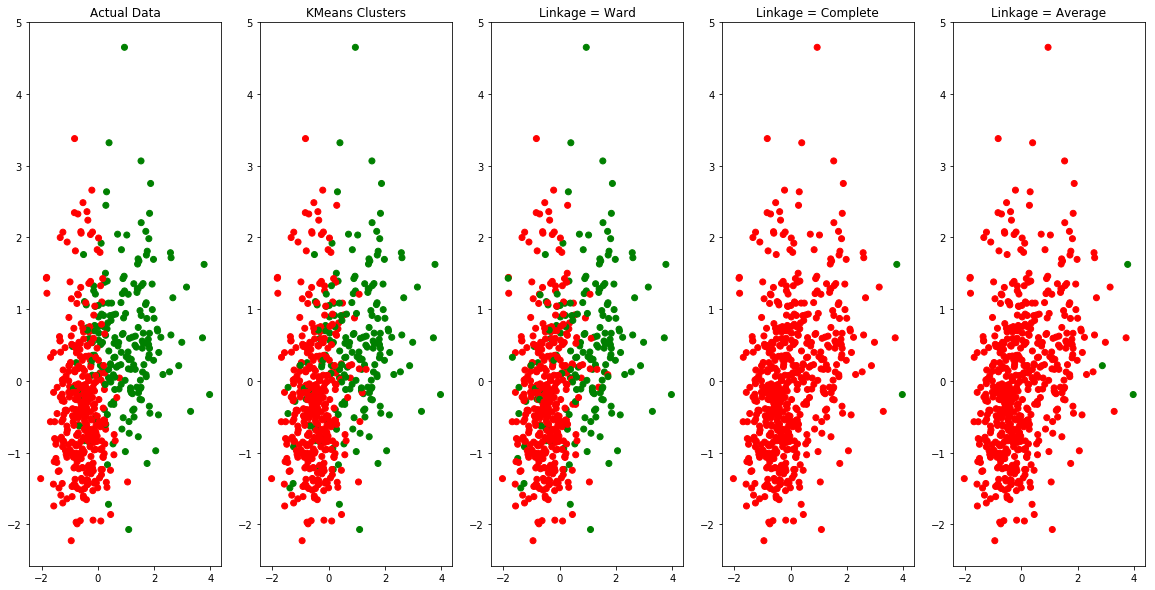

In [13]:
# visualise the clusters

import matplotlib.pyplot as plt

colors = ['red', 'green']
reverse_colors = ['green', 'red']
kmn_colors = [colors[label] for label in kmeans.labels_]

### Note here we have reversed the color orientations here to reflect the dominant categories
ward_colors = [reverse_colors[label] for label in ward.labels_]
complete_colors = [colors[label] for label in complete.labels_]
average_colors = [colors[label] for label in average_link.labels_]
actual_colors = [colors[label] for label in y]

f, axarr = plt.subplots(1,5, sharex=True, figsize=(20,10))
axarr[0].scatter(x[:,0], x[:,1], c=actual_colors)
axarr[0].set_title('Actual Data')

axarr[1].scatter(x[:,0], x[:,1], c=kmn_colors)
axarr[1].set_title('KMeans Clusters')


axarr[2].scatter(x[:,0], x[:,1], c=ward_colors)
axarr[2].set_title('Linkage = Ward')


axarr[3].scatter(x[:,0], x[:,1], c=complete_colors)
axarr[3].set_title('Linkage = Complete')

axarr[4].scatter(x[:,0], x[:,1], c=average_colors)
axarr[4].set_title('Linkage = Average')

# In above analysis following results were observerd

1. Kmeans gave accuracy of 90.5% 
2. In Hierarchicial clustering Ward linkage initially gave accuracy of 11% but it was observed that classes were predected in reverse so after reversing classes predicted accuracy came out to be 88%

